In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scripts.metric as metric
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Get the data and pre-process the data

In [3]:
df = pd.read_csv('../data/data_ready.csv')
df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.955827,10.366309,1,1,6,5,1960,1960,4.727388,3,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.360741,1,1,5,6,1961,1961,0.000000,3,...,0,0,0,1,0,0,0,0,1,0
2,4.406719,9.565775,1,1,6,6,1958,1958,4.691348,3,...,0,0,0,1,0,0,0,0,1,0
3,4.543295,9.320181,1,1,7,5,1968,1968,0.000000,4,...,0,0,0,1,0,0,0,0,1,0
4,4.317488,9.534668,1,1,5,5,1997,1998,0.000000,3,...,0,0,0,1,0,0,0,0,1,0


In [4]:
y = df.SalePrice.values
X = df.drop('SalePrice', axis=1).values
# X = X[:,selected_features]
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2930, 271)
y shape: (2930,)


In [5]:
# Shuffle the data
np.random.seed(527)
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [6]:
# Get training, validation, and test data
N = X.shape[0] # 2930 observations in total
num_trn = 2200
num_val = 230
num_tst = N - num_trn - num_val # 500
trn_mask = range(0,num_trn)
val_mask = range(num_trn,num_trn+num_val)
tst_mask = range(num_trn+num_val,N)
X_trn = X[trn_mask]
y_trn = y[trn_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_tst = X[tst_mask]
y_tst = y[tst_mask]

In [7]:
# Standardize Features
mean = X_trn.mean()
std  = X_trn.std()
X_trn = (X_trn - mean) / std
X_val = (X_val - mean) / std
X_tst = (X_tst - mean) / std

### Helper Functions

In [8]:
def eval_model(model, title):
  print("Training:")
  metric.evaluate(y_trn, model.predict(X_trn), title+" Training", title+" trn.png")
  print("Validation:")
  metric.evaluate(y_val, model.predict(X_val), title+" Validation", title+" val.png")
  print("Test:")
  metric.evaluate(y_tst, model.predict(X_tst), title+" Test", title+" tst.png")

### Select only lasso selected features

In [9]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=7.6e-7)
lasso.fit(X_trn, y_trn)
X_trn = X_trn[:,lasso.coef_ != 0]
X_val = X_val[:,lasso.coef_ != 0]
X_tst = X_tst[:,lasso.coef_ != 0]

In [17]:
print(X_trn.shape)

(2200, 146)


### Linear Regression without Regularization

alpha: 0, rmse_val: 0.11621020029728343
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Training:
RMSE: 0.10190413551196041
R2: 0.9368599924253873


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


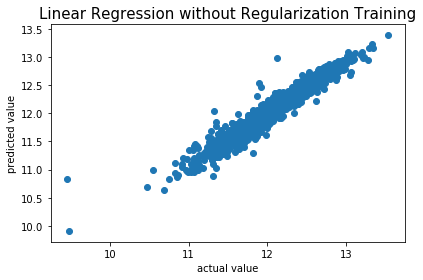

Validation:
RMSE: 0.11621020029728343
R2: 0.9218866545398542


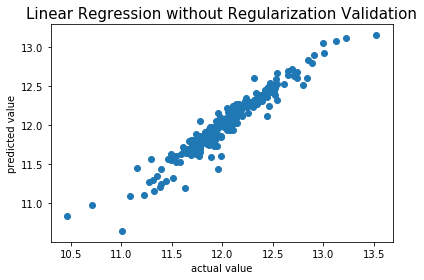

Test:
RMSE: 0.11498658729016739
R2: 0.9220391087377928


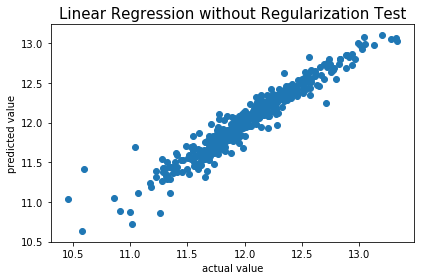

In [10]:
from sklearn import linear_model
alphas = [0]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression without Regularization")

### Ridge Regression

alpha: 1.5e-07, rmse_val: 0.11621907929452016
alpha: 2.25e-07, rmse_val: 0.11622374018058161
alpha: 3.375e-07, rmse_val: 0.11623099056076724
alpha: 5.0625e-07, rmse_val: 0.11624240950916742
alpha: 7.593749999999999e-07, rmse_val: 0.11626063669926734
alpha: 1.1390625e-06, rmse_val: 0.11629007500138129
alpha: 1.70859375e-06, rmse_val: 0.11633787615974807
alpha: 2.562890625e-06, rmse_val: 0.11641491750829296
alpha: 3.8443359375e-06, rmse_val: 0.1165357106539005
alpha: 5.766503906249999e-06, rmse_val: 0.11671509186080706
alpha: 8.649755859375e-06, rmse_val: 0.11695950265770873
alpha: 1.29746337890625e-05, rmse_val: 0.11725422233052103
alpha: 1.946195068359375e-05, rmse_val: 0.11755475472410575
alpha: 2.9192926025390623e-05, rmse_val: 0.11779295660976435
alpha: 4.3789389038085936e-05, rmse_val: 0.11789913549816732
alpha: 6.56840835571289e-05, rmse_val: 0.11782820923397176
alpha: 9.852612533569336e-05, rmse_val: 0.11757629896855616
alpha: 0.00014778918800354004, rmse_val: 0.11718431843344765

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


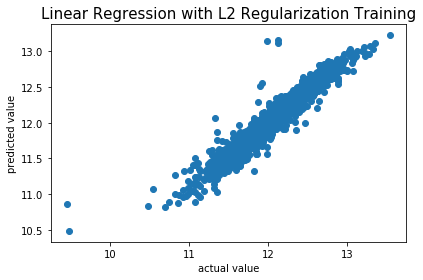

Validation:
RMSE: 0.11615649667488052
R2: 0.9219588340954976


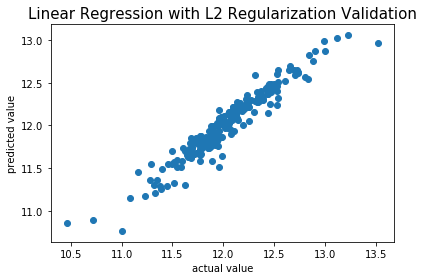

Test:
RMSE: 0.11851663895966259
R2: 0.9171788837516308


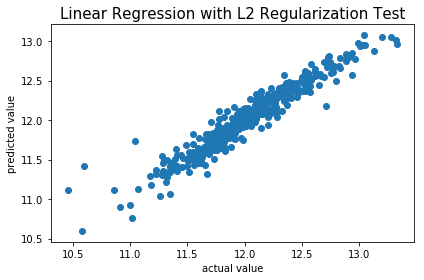

In [12]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression with L2 Regularization")

### Lasso Regression

alpha: 1.5e-07, rmse_val: 0.11511020674493724
alpha: 2.25e-07, rmse_val: 0.11468095524921512
alpha: 3.375e-07, rmse_val: 0.11410030609490593
alpha: 5.0625e-07, rmse_val: 0.11338863183140664
alpha: 7.593749999999999e-07, rmse_val: 0.11268773753784583
alpha: 1.1390625e-06, rmse_val: 0.11324410794420048
alpha: 1.70859375e-06, rmse_val: 0.11409122172258339
alpha: 2.562890625e-06, rmse_val: 0.1161972976813939
alpha: 3.8443359375e-06, rmse_val: 0.11658971685761246
alpha: 5.766503906249999e-06, rmse_val: 0.11726874161838496
alpha: 8.649755859375e-06, rmse_val: 0.11674844932699611
alpha: 1.29746337890625e-05, rmse_val: 0.1177175560372151
alpha: 1.946195068359375e-05, rmse_val: 0.1191655418345694
alpha: 2.9192926025390623e-05, rmse_val: 0.12192155278303854
alpha: 4.3789389038085936e-05, rmse_val: 0.13089155113869405
alpha: 6.56840835571289e-05, rmse_val: 0.14266291580447574
alpha: 9.852612533569336e-05, rmse_val: 0.1523821836168557
alpha: 0.00014778918800354004, rmse_val: 0.16694913651324314
al

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


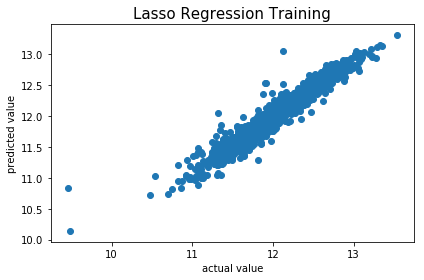

Validation:
RMSE: 0.11268773753784583
R2: 0.9265502946542112


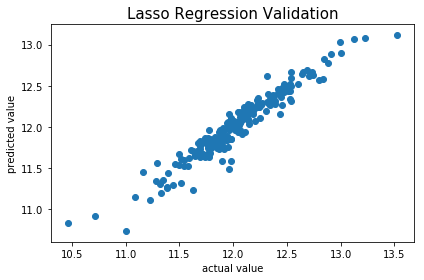

Test:
RMSE: 0.11394091307023098
R2: 0.9234505954480062


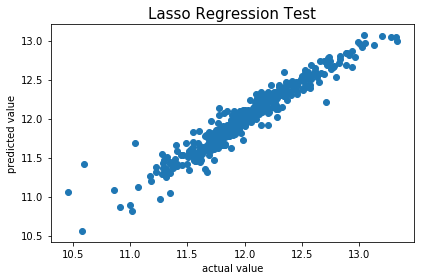

In [13]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Lasso Regression")

### SVR

C: 1.500e+03, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.12234064342795756
C: 2.250e+03, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.11755229686311786
C: 3.375e+03, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.11363796927034699
C: 5.062e+03, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.11009540942989372
C: 7.594e+03, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.10877960586890525
C: 1.139e+04, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.10759190462379709
C: 1.709e+04, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.10713761170629056
C: 2.563e+04, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.10655931923814192
C: 3.844e+04, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.10635523501155965
C: 5.767e+04, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.10835470936751448
C: 8.650e+04, gamma: 7.000e-03, epsilon: 1.200e-03, rmse_val: 0.11279621446022989
SVR(C=38443.359375, cache_size=200, coef0=0.0, degree=3, epsilon=0.0012,
  gamma=0.007, kernel='rb

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


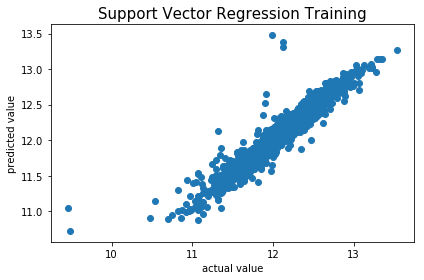

Validation:
RMSE: 0.10635523501155965
R2: 0.9345733804246074


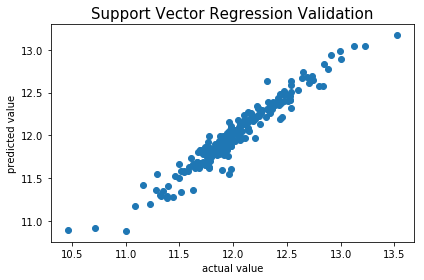

Test:
RMSE: 0.11640925857559044
R2: 0.9200980326921567


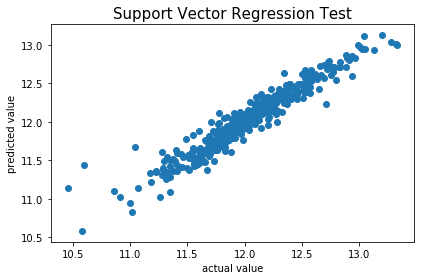

In [19]:
from sklearn.svm import SVR
Cs = [1e3*(1.5**i) for i in range(1, 12)]
epsilons = [0.0012]
gammas = [0.007]

best_rmse = None
best_model = None
for C in Cs:
  for epsilon in epsilons:
    for gamma in gammas:
      model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
      model.fit(X_trn, y_trn)
      rmse_val = metric.rmse(y_val, model.predict(X_val))
      print("C: {:.3e}, gamma: {:.3e}, epsilon: {:.3e}, rmse_val: {}".format(C, gamma, epsilon, rmse_val))
      if best_rmse is None or rmse_val < best_rmse:
        best_rmse = rmse_val
        best_model = model
      
print(best_model)
eval_model(best_model, "Support Vector Regression")

### Random Forest

n_estimators: 1000, rmse_val: 0.12894474298826
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training:
RMSE: 0.050590601881076155
R2: 0.9844381686603804


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


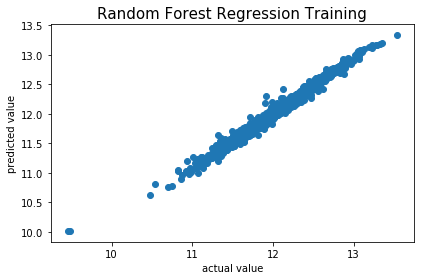

Validation:
RMSE: 0.12894474298826
R2: 0.9038290246583318


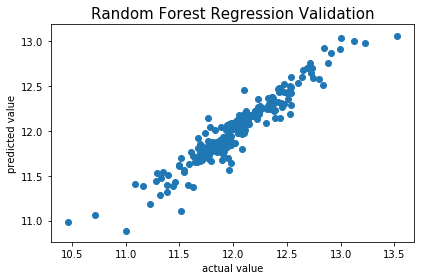

Test:
RMSE: 0.13150792802044067
R2: 0.898026741623618


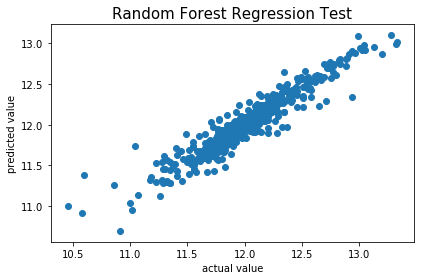

In [20]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [1000]

best_rmse = None
best_model = None

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators=n_estimators)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("n_estimators: {}, rmse_val: {}".format(n_estimators, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model
    
print(best_model)
eval_model(best_model, "Random Forest Regression")